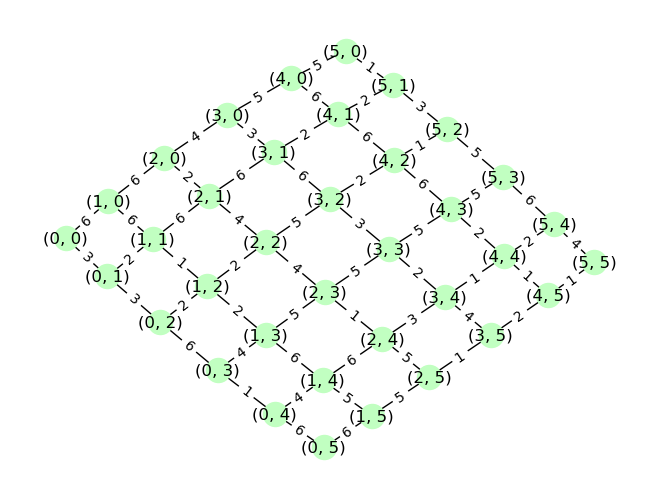

In [2]:
# A* SHORTEST PATH SEARCH ALGORITHM

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

def dist(a, b):                                    # The distance between two nodes by Pythagoras
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5   

G = nx.grid_graph(dim=[6, 6])                      # Nodes are two-tuples (x,y)
nx.set_node_attributes(G,"#C1FFC1", name= 'color')
col = nx. get_node_attributes(G, 'color')
nx.set_edge_attributes(G, 'k', name='color')
#print("Colors:",col)
nx.set_edge_attributes(G, {e: rnd.randint(1,6) for e in G.edges()}, "cost")
#.. Dictionary where key is edge e and value is rnd.randint(1,6)

#print("edges:",G.edges())
#print("Edge (1,0)--> (2,0)  =", G.edges[(1,0),(2,0)])
#print("Edge (1,0)--> (1,1)  =", G.edges[(1,0),(1,1)])
#print("Cost for (2,1)--> (2,2)  =", G.edges[(2,1), (2,2)]["cost"])

# GRAPH  without path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color= "#C1FFC1")
edge_labels = nx.get_edge_attributes(G, "cost")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [3]:
# PATH
# Start from (0,0), destination (5,5)
pathnodes = nx.astar_path(G, (0, 0), (5, 5), heuristic=dist, weight="cost")
length = nx.astar_path_length(G, (0, 0), (5, 5), heuristic=dist, weight="cost")
print("Path: ",  pathnodes)  # Nodes
print("Path length: " , length)

pathedges = []
for i in range(len(pathnodes)-1):
    pathedges.append((pathnodes[i], pathnodes[i+1]))
#print(pathedges)

# Change the node colors of the path to 'Gold1'.
for pn in pathnodes:
    G.nodes[pn]['color']="#FFD700"
ncols = nx.get_node_attributes(G, 'color').values()  # Values of the color dictionary 
# print(ncols) 


# Change the edge colors of the path to 'Gold1'.
for pe in pathedges:
    G.edges[pe]['color']="#FFD700"    
ecols = nx.get_edge_attributes(G, 'color').values()  # Values of the color dictionary 
#print(ecols)

Path:  [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5)]
Path length:  19


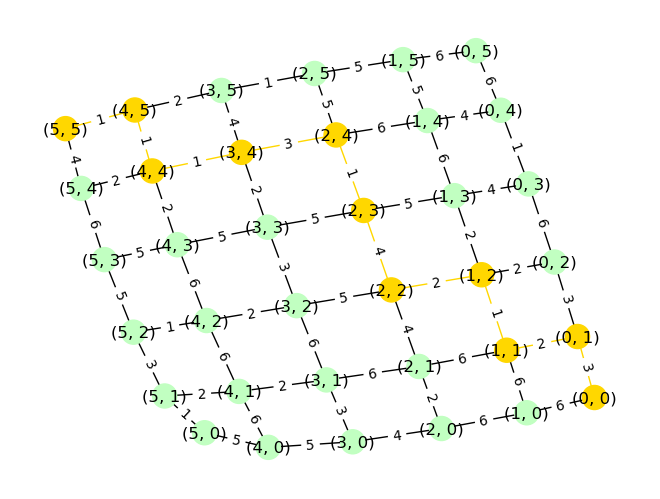

In [4]:
# GRAPH  with path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=ncols, edge_color=ecols,) 
        
edge_labels = nx.get_edge_attributes(G, "cost")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()